In [1]:
import cv2 #open cv 모듈 #open cv는 numpy의 자료형을 다룸
from google.colab import files #코랩에서 파일불러오기위한 모듈
from google.colab.patches import cv2_imshow #코랩에서 내놓은 cv호환패치 모듈
import numpy as np
from time import time, sleep

Saving flower.jpg to flower.jpg
(391, 400, 3)


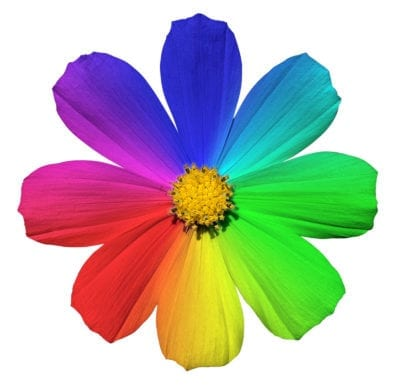

In [2]:
file1 = files.upload()
img1 = cv2.imread("flower.jpg") #"flower.jpg"는 업로드하는 이미지 파일명으로 수정 필요 #절대경로 혹은 상대경로로 가져옴
print(img1.shape) #shape로 정보 출력 (가로,세로,채널) -> 이미지가 가진 정보의 행렬의 크기를 알 수 있음
cv2_imshow(img1) 
#넘파이 np.zeros(shape,dtype,order) opencv에서 쓰는 자료타입만들기 b g r 순서로 색정보가 배열되어있음 

In [65]:
 #Bilinear Interpolation 쌍선형 보간법
#x: 0 n 2n 3n ~(width-1)*n, y:0 n 2 n 3n ~ (height-1)*n
def xbilinear(imgg,nx,ny,x,y):
  px=int(x-x%nx); py=int(y-y%ny)
  if x%nx==0 and y%ny==0:
    return imgg[py][px][0], imgg[py][px][1], imgg[py][px][2]
  else:
    h1=y%ny; h2=ny-h1;
    w1=x%nx; w2=nx-w1;
    a=h1/ny; b=h2/ny; p=w1/nx; q=w2/nx;
    A=imgg[py][px]
    B=imgg[py][px+1]
    C=imgg[py+1][px]
    D=imgg[py+1][px+1]
    tlst=[]
    for z in range(3):
      P=q*(b*A[z]+a*B[z])+p*(b*D[z]+a*C[z])
      tlst.append(P)

    return tlst[0], tlst[1], tlst[2]

#Bilinear Interpolation 쌍선형 보간법 사이즈 재설정
def Bilinear_Resize(이미지,x비율,y비율):
  img1=이미지
  nx=x비율
  ny=y비율
  height, width, channel = img1.shape
  n_height=int(height*ny)
  n_width=int(width*nx)
  print(n_height,n_width)
  n_img=np.zeros(shape=(n_height,n_width,channel), dtype=np.uint8)
  #반복구문에서 쓰기위해 보정
  lennx=1
  if nx>1:
    lennx=int(nx)
  lenny=1
  if ny>1:
    lenny=int(ny)


  #격자 채워넣기
  for y in range(0,n_height,lenny): #세로라서 y로 지정
    oimg=img1[int(y/ny)]
    nty=n_img[y]
    for a in range(lenny):
      iya=y+a
      if iya>=n_height:
        iya=n_height-1
      ntya=n_img[iya]
      for b in range(lennx):
        for x in range(0,n_width,lennx): #가로라서 x로 지정
          ntya[x][0]=oimg[int(x/nx)][0]
          ntya[x][1]=oimg[int(x/nx)][1]
          ntya[x][2]=oimg[int(x/nx)][2]
          nty[int(x+b)][0]=oimg[int(x/nx)][0]
          nty[int(x+b)][1]=oimg[int(x/nx)][1]
          nty[int(x+b)][2]=oimg[int(x/nx)][2]

  #구역마다 채워넣기
  for y in range(0,(n_height-1),lenny): #세로라서 y로 지정
    oimg=img1[int(y/ny)]
    for a in range(1,lenny): #격자방식일때는 1부터
      nya=n_img[y+a]
      for b in range(1,lennx):  #격자방식일때는 1부터
        for x in range(0,(n_width-1),lennx): #가로라서 x로 지정
          nya[x+b][0], nya[x+b][1], nya[x+b][2]=xbilinear(n_img,nx,ny,x,y)     

  cv2_imshow(n_img)
  return n_img

782 800


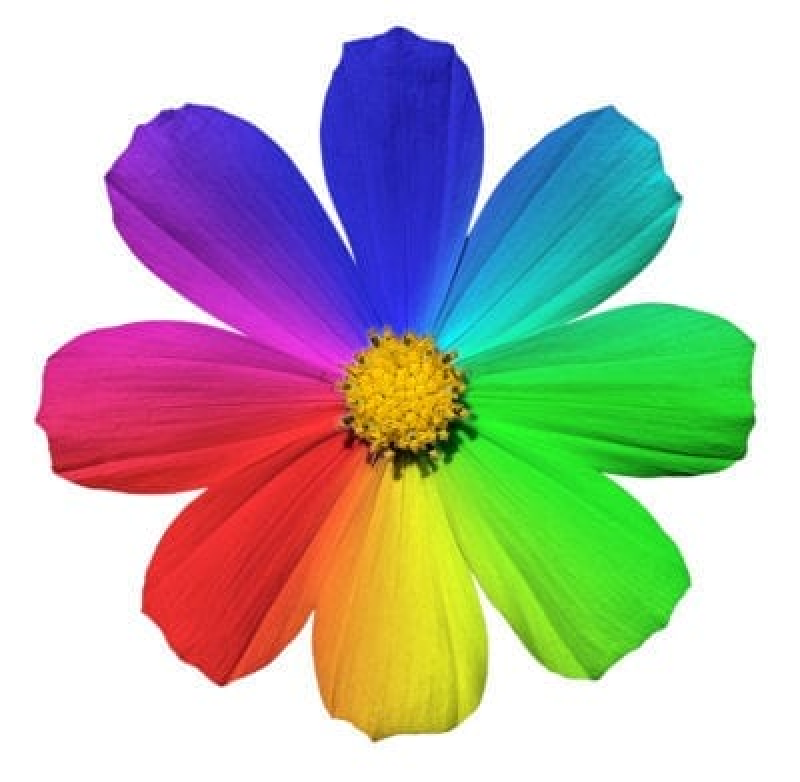

In [68]:
a=Bilinear_Resize(img1,2,2)
#색 가이드를 격자나 점으로 만들고 그안을 채우는방식이라 가이드비율이 깨지는 소수점에서 이미지가 이상하게 될 수 있음